In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from models import *
from opt import encode
from tqdm import tnrange

sns.set_context('paper', font_scale=1.5)

In [45]:
np.random.seed(0)

# figure out how many dimensions we need using plates formula
n = 18   # number of atomic values in the language
k = 6;      # maximum number of terms to be combined
err = 0.02; # error probability

from opt import plate_formula, embed, encode, decode, embed_onehot
d = plate_formula(n, k, err)
print d

def embed(d):
    return np.random.randn(1, d) / np.sqrt(d)

verb_property = embed(d) * 1.00
noun_property = embed(d) * 1.00

words = {
    'Ask': embed(d),
    'Answer':  embed(d),
    'Chase': embed(d),
    'Tom': (embed(d) + noun_property),
    'Charan':(embed(d) + noun_property),
    'Jill': (embed(d) + noun_property),
    'Talia': (embed(d) + noun_property),
    'Tony': (embed(d) + noun_property),
    'Clarisa': (embed(d) + noun_property),
    'Bruce': (embed(d) + noun_property),
    'Dick': (embed(d) + noun_property),
    'Dog': (embed(d) + noun_property),
    'Cat': (embed(d) + noun_property),
}

roles = {
    'Agent': embed(d),
    'Patient': embed(d),
    'Verb': embed(d)
}


266


['Answer', 'Ask', 'Bruce', 'Cat', 'Charan', 'Chase', 'Clarisa', 'Dick', 'Dog', 'Jill', 'Talia', 'Tom', 'Tony']


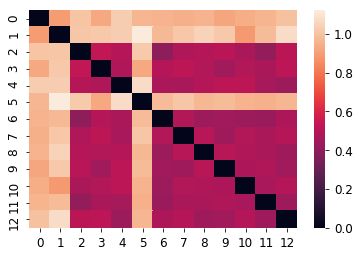

In [3]:
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances

keys =  words.keys()
keys.sort()
print keys
sns.heatmap(cosine_distances([words[w].reshape(-1) for w in keys]))

['Answer', 'Ask', 'Bruce', 'Cat', 'Charan', 'Chase', 'Clarisa', 'Dick', 'Dog', 'Jill', 'Talia', 'Tom', 'Tony']


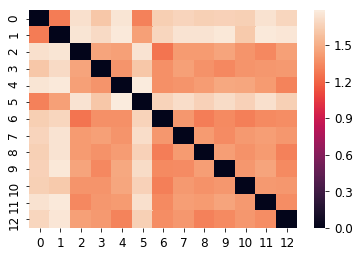

In [4]:
keys =  words.keys()
keys.sort()
print keys
sns.heatmap(euclidean_distances([words[w].reshape(-1) for w in keys]))

In [5]:
sentences = [
    ['Ask', 'Tom', 'Charan'], ['Answer', 'Charan', 'Tom'],
#     ['Ask', 'Tom', 'Jill'],  ['Answer', 'Jill', 'Tom'],
#     ['Ask', 'Tom', 'Talia'],  ['Answer', 'Talia', 'Tom'],
#     ['Ask', 'Tom', 'Tony'],  ['Answer', 'Tony', 'Tom'],
#     ['Ask', 'Tom', 'Clarisa'],  ['Answer', 'Clarisa', 'Tom'],

#     ['Ask', 'Charan', 'Tom'], ['Answer', 'Tom', 'Charan'],
#     ['Ask', 'Charan', 'Jill'],  ['Answer', 'Jill', 'Charan'],
#     ['Ask', 'Charan', 'Talia'],  ['Answer', 'Talia', 'Charan'],
#     ['Ask', 'Charan', 'Tony'],  ['Answer', 'Tony', 'Charan'],
#     ['Ask', 'Charan', 'Clarisa'],  ['Answer', 'Clarisa', 'Charan'],

    ['Ask', 'Jill', 'Talia'], ['Answer', 'Talia', 'Jill'],
#     ['Ask', 'Jill', 'Tom'], ['Answer', 'Tom', 'Jill'],
#     ['Ask', 'Jill', 'Charan'], ['Answer', 'Charan', 'Jill'],
#     ['Ask', 'Jill', 'Tony'], ['Answer', 'Tony', 'Jill'],
#     ['Ask', 'Jill', 'Clarisa'],  ['Answer', 'Charan', 'Jill'],

#     ['Ask', 'Talia', 'Tom'],  ['Answer', 'Tom', 'Talia'],
#     ['Ask', 'Talia', 'Jill'], ['Answer', 'Jill', 'Talia'],
#     ['Ask', 'Talia', 'Charan'],  ['Answer', 'Charan', 'Talia'],
#     ['Ask', 'Talia', 'Tony'],  ['Answer', 'Tony', 'Talia'],
#     ['Ask', 'Talia', 'Clarisa'],  ['Answer', 'Clarisa', 'Talia'],

#     ['Ask', 'Tony', 'Tom'], ['Answer', 'Tom', 'Tony'],
#     ['Ask', 'Tony', 'Jill'], ['Answer', 'Jill', 'Tony'],
#     ['Ask', 'Tony', 'Charan'],  ['Answer', 'Charan', 'Tony'],
#     ['Ask', 'Tony', 'Talia'],  ['Answer', 'Talia', 'Tony'],
    ['Ask', 'Tony', 'Clarisa'],  ['Answer', 'Clarisa', 'Tony'],
    
#     ['Ask', 'Clarisa', 'Tom'], ['Answer', 'Tom', 'Clarisa'],
#     ['Ask', 'Clarisa', 'Jill'], ['Answer', 'Jill', 'Clarisa'],
#     ['Ask', 'Clarisa', 'Charan'],  ['Answer', 'Charan', 'Clarisa'],
#     ['Ask', 'Clarisa', 'Talia'],  ['Answer', 'Talia', 'Clarisa'],
#     ['Ask', 'Clarisa', 'Tony'],  ['Answer', 'Tony', 'Clarisa'],
]

x_train = []
for s in sentences:
    x_train.append(
        encode(words[s[0]], roles['Verb']) 
            + encode(words[s[1]], roles['Agent']) 
            + encode(words[s[2]], roles['Patient'])
    )
    
test_a = [
    encode(words['Ask'], roles['Verb']) 
        + encode(words['Tom'], roles['Agent']) 
        + encode(words['Charan'], roles['Patient']),
    encode(words['Answer'], roles['Verb']) 
        + encode(words['Charan'], roles['Agent']) 
        + encode(words['Tom'], roles['Patient']),
]


test_b = [
    encode(words['Ask'], roles['Verb']) 
        + encode(words['Bruce'], roles['Agent']) 
        + encode(words['Dick'], roles['Patient']),
    encode(words['Answer'], roles['Verb']) 
        + encode(words['Dick'], roles['Agent']) 
        + encode(words['Bruce'], roles['Patient'])  
]

test_c = [
    encode(words['Ask'], roles['Verb']) 
        + encode(words['Tom'], roles['Agent']) 
        + encode(words['Charan'], roles['Patient']),
    encode(words['Chase'], roles['Verb']) 
        + encode(words['Dog'], roles['Agent']) 
        + encode(words['Cat'], roles['Patient']),
]

test_d = [
    encode(words['Ask'], roles['Verb']) 
        + encode(words['Tom'], roles['Agent']) 
        + encode(words['Charan'], roles['Patient']),
    encode(words['Ask'], roles['Verb']) 
        + encode(words['Tom'], roles['Agent']) 
        + encode(words['Charan'], roles['Patient']),
]

test_e = [
    encode(words['Ask'], roles['Verb']) 
        + encode(words['Tom'], roles['Agent']) 
        + encode(words['Charan'], roles['Patient']),
    encode(words['Ask'], roles['Verb']) 
        + encode(words['Bruce'], roles['Agent']) 
        + encode(words['Dick'], roles['Patient']),
]


In [6]:
10**-0.26

0.5495408738576245

In [7]:
# SEM parameters
# df0 = 1.0
# mode = 0.15
df0 = 100.0
mode = 0.305
scale0 = (mode * (df0 + 2)) / df0
print scale0

lmda = 1.0  # stickyness parameter
alfa = 2.  # concentration parameter


f_class = NonLinearEvent
# f_class = LinearDynamicSystem
f_opts=dict(var_scale0=scale0, var_df0=df0, dropout=0.5, n_hidden = d, n_epochs=100,
           prior_log_prob=2.0)

sem_kwargs = dict(lmda=lmda, alfa=alfa, f_class=f_class, f_opts=f_opts)

_x = np.concatenate(x_train, axis=0)
event_types = np.array([0] * len(x_train))
event_boundaries = np.array([1, 0] * len(x_train))

sem_model = SEM(**sem_kwargs)

0.3111


In [8]:
def print_evalute(x, event_model, metric=euclidean_distances):
    print "t=0, f0={}, origin={}".format(
        metric(event_model.predict_f0(), x[0])[0][0], metric(np.zeros((1, d)), x[0])[0][0])
    print "t=1, f(x)={}, f0={}, origin={}".format(
        metric(event_model.predict_next_generative(x[0]), x[1])[0][0],
        metric(event_model.predict_f0(), x[1])[0][0],
        metric(np.zeros((1, d)), x[1])[0][0])
    
def print_models_likelihood(x, event_model_0, event_model_1):
    print "t=0, p(f0_a)={}, p(f0_a)={}".format(
        event_model_0.log_likelihood_f0(x[0]),
        event_model_1.log_likelihood_f0(x[0])
    )
    print "t=1, p(f(x)_a)={}, p(f0_a)={}, p(f0_b)={}".format(
        event_model_0.log_likelihood_sequence(x[0], x[1]), 
        event_model_0.log_likelihood_f0(x[1]),
        event_model_1.log_likelihood_f0(x[1])
    )


# Test Case A

In [9]:
# Ask(Tom, Charan) -> Answer(Charan, Tom)
sem_model = SEM(**sem_kwargs)
sem_model.pretrain(_x, event_types, event_boundaries)
sem_model._update_state(np.concatenate(test_a), 3)
sem_model.run(np.concatenate(test_a), compile_model=False)

results = [
    {
        'Test Case': 'Answer(Charan,Tom)',
        'Boundary': np.exp(sem_model.results.log_boundary_probability)[1],
        'New Event': 1-sem_model.results.post[1, 0]
    }
]

print np.exp(sem_model.results.log_boundary_probability)
print sem_model.results.e_hat

Run SEM: 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

[1.00000000e+00 1.24592784e-05]
[0 0]


[0.00000000e+00 1.30434229e-05]


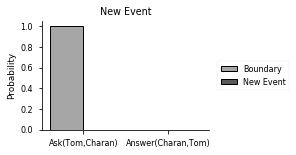

In [10]:
sns.set_context('paper', font_scale=1.0)

def plot_results(results, x_labels):
    fig, ax = plt.subplots(1, 1, figsize=(3.0, 2.0), sharey=True)
    w = 0.4
    
    y = np.exp(sem_model.results.log_boundary_probability)
    ax.bar([0-w/2., 1.-w/2.], y, facecolor=[0.65, 0.65, 0.65], width=w, edgecolor='k', lw=1, label='Boundary')
    ax.set_ylabel('Probability')
    ax.set_title('Boundary')
    ax.set_title('New Event')
    
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels(x_labels, rotation=0)
    
    y = 1-results.post[:, 0]
    print y
    ax.bar([0+w/2., 1.+w/2.], y, facecolor=[0.35, 0.35, 0.35], width=w, edgecolor='k', lw=1, label='New Event')


    plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
    sns.despine()
    
plot_results(sem_model.results, 'Ask(Tom,Charan) Answer(Charan,Tom)'.split(' '))
# plt.savefig('generalization_test_case_a.png', dpi=300, bbox_inches='tight')

In [11]:
sem_model.results.post[:, 0]

array([1.        , 0.99998696])

In [12]:
print sem_model.results.restart_prob, sem_model.results.repeat_prob

-1.2756807800053827 14.004898939640396


In [13]:
print sem_model.results.log_like

[[ 0.                -inf        -inf]
 [11.92545766  2.                -inf]]


In [14]:
print sem_model.results.log_prior

[[2.               -inf       -inf]
 [2.01490302 0.69314718       -inf]]


In [15]:
print_evalute(test_a, sem_model.event_models[0])

t=0, f0=0.832081358168, origin=2.48438221807
t=1, f(x)=0.221762006799, f0=2.10408275129, origin=2.41267799517


In [16]:
print_models_likelihood(test_a, sem_model.event_models[0], sem_model.event_models[1])

t=0, p(f0_a)=10.8339431847, p(f0_a)=2.0
t=1, p(f(x)_a)=13.0652772967, p(f0_a)=-2.12745912741, p(f0_b)=2.0


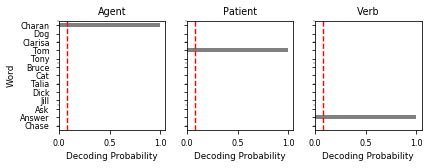

<Figure size 432x288 with 0 Axes>

In [17]:
# check the decoding here
from opt import decode
from scipy.linalg import norm
from scipy.special import logsumexp

gamma = 50.0

agent = decode(sem_model.results.y_hat[1], roles['Agent'])
patient = decode(sem_model.results.y_hat[1], roles['Patient'])
verb = decode(sem_model.results.y_hat[1], roles['Verb'])


_df = []
for w in words.keys():
    _df.append({
        'Word': w,
        'Agent Prob': gamma * -cosine_distances(agent, words[w])[0][0],
        'Patient Prob': gamma * -cosine_distances(patient, words[w])[0][0],
        'Verb Prob': gamma * -cosine_distances(verb, words[w])[0][0],
    }) 
_df = pd.DataFrame(_df)
_df['Agent Prob'] =np.exp( _df['Agent Prob'] - logsumexp(_df['Agent Prob']))
_df['Patient Prob'] =np.exp( _df['Patient Prob'] - logsumexp(_df['Patient Prob']))
_df['Verb Prob'] =np.exp( _df['Verb Prob'] - logsumexp(_df['Verb Prob']))

# plot
fig, axes = plt.subplots(1, 3, figsize=(6.5, 2.0), sharey=True)
_df.sort_values('Agent Prob', inplace=True)
_df.plot(x='Word', y='Agent Prob', kind='barh', color='grey', ax=axes[0], legend=None, title='Agent')
_df.plot(x='Word', y='Patient Prob', kind='barh', color='grey', ax=axes[1], legend=None, title='Patient')
_df.plot(x='Word', y='Verb Prob', kind='barh', color='grey', ax=axes[2], legend=None, title='Verb')

for ax in axes:
    ax.plot([1. / len(_df), 1. / len(_df)], plt.gca().get_ylim(), c='r', ls='--')
    ax.set_xlabel('Decoding Probability')
plt.show()
plt.savefig('DecodingA.png', dpi=300, bbox_iunches='tight')

In [18]:
from scipy.stats import multivariate_normal


print multivariate_normal.logpdf(test_a[1].reshape(-1), mean=sem_model.results.y_hat[1].reshape(-1), cov=sem_model.event_models[0].Sigma)
print multivariate_normal.logpdf(test_b[1].reshape(-1), mean=sem_model.results.y_hat[1].reshape(-1), cov=sem_model.event_models[0].Sigma)

13.16094008962801
-0.7777956902103149


In [19]:
a = multivariate_normal.logpdf(test_a[1].reshape(-1), mean=sem_model.results.y_hat[1].reshape(-1), cov=sem_model.event_models[0].Sigma)
b = multivariate_normal.logpdf(test_b[1].reshape(-1), mean=sem_model.results.y_hat[1].reshape(-1), cov=sem_model.event_models[0].Sigma)
z = logsumexp([a, b])
print np.exp(a - z), np.exp(b - z)
print np.exp(a - b)

0.9999991159362516 8.840637478975881e-07
1131139.1495402588


# Test Case B

In [20]:
# Ask(Bruce, Dick) -> Answer(Dick, Bruce)
sem_model = SEM(**sem_kwargs)
sem_model.pretrain(_x, event_types, event_boundaries)
sem_model._update_state(np.concatenate(test_b), 3)
sem_model.run(np.concatenate(test_b), compile_model=False)

results.append(
    {
        'Test Case': 'Answer(Dick,Bruce)',
        'Boundary': np.exp(sem_model.results.log_boundary_probability)[1],
        'New Event': 1-sem_model.results.post[1, 0]
    }
)

print np.exp(sem_model.results.log_boundary_probability)
print sem_model.results.e_hat

Run SEM: 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

[1.        0.1341019]
[0 0]


[0.         0.11392921]


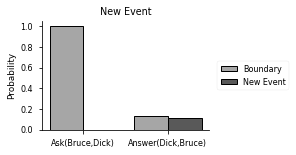

In [21]:
plot_results(sem_model.results, 'Ask(Bruce,Dick) Answer(Dick,Bruce)'.split(' '))
# plt.savefig('generalization_test_case_b.png', dpi=300, bbox_inches='tight')

In [22]:
sem_model.results.log_like

array([[0.        ,       -inf,       -inf],
       [2.72946374, 2.        ,       -inf]])

In [23]:
print sem_model.results.restart_prob, sem_model.results.repeat_prob

1.274159574755428 4.775004318670497


In [24]:
print_evalute(test_b, sem_model.event_models[0])

t=0, f0=1.17244534139, origin=2.26451490236
t=1, f(x)=0.580476958334, f0=1.91887872924, origin=2.18113776608


In [25]:
print_models_likelihood(test_b, sem_model.event_models[0], sem_model.event_models[1])

t=0, p(f0_a)=8.45163811838, p(f0_a)=2.0
t=1, p(f(x)_a)=12.0517558609, p(f0_a)=0.444568238926, p(f0_b)=2.0


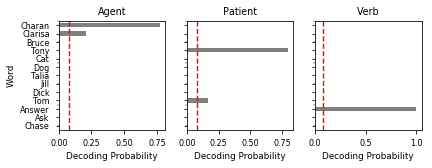

<Figure size 432x288 with 0 Axes>

In [26]:
# check the decoding here
from opt import decode
from scipy.linalg import norm
from scipy.special import logsumexp

agent = decode(sem_model.results.y_hat[1], roles['Agent'])
patient = decode(sem_model.results.y_hat[1], roles['Patient'])
verb = decode(sem_model.results.y_hat[1], roles['Verb'])


_df = []
for w in words.keys():
    _df.append({
        'Word': w,
        'Agent Prob': -gamma * cosine_distances(agent, words[w])[0][0],
        'Patient Prob': -gamma * cosine_distances(patient, words[w])[0][0],
        'Verb Prob': -gamma * cosine_distances(verb, words[w])[0][0],
    }) 
_df = pd.DataFrame(_df)
_df['Agent Prob'] =np.exp( _df['Agent Prob'] - logsumexp(_df['Agent Prob']))
_df['Patient Prob'] =np.exp( _df['Patient Prob'] - logsumexp(_df['Patient Prob']))
_df['Verb Prob'] =np.exp( _df['Verb Prob'] - logsumexp(_df['Verb Prob']))

# plot
fig, axes = plt.subplots(1, 3, figsize=(6.5, 2.0), sharey=True)
_df.sort_values('Agent Prob', inplace=True)
_df.plot(x='Word', y='Agent Prob', kind='barh', color='grey', ax=axes[0], legend=None, title='Agent')
_df.plot(x='Word', y='Patient Prob', kind='barh', color='grey', ax=axes[1], legend=None, title='Patient')
_df.plot(x='Word', y='Verb Prob', kind='barh', color='grey', ax=axes[2], legend=None, title='Verb')

for ax in axes:
    ax.plot([1. / len(_df), 1. / len(_df)], plt.gca().get_ylim(), c='r', ls='--')
    ax.set_xlabel('Decoding Probability')
plt.show()
plt.savefig('DecodingB.png', dpi=300, bbox_iunches='tight')

In [27]:
b_foil = encode(words['Answer'], roles['Verb']) \
        + encode(words['Bruce'], roles['Agent']) \
        + encode(words['Dick'], roles['Patient'])  
        
a = multivariate_normal.logpdf(test_a[1].reshape(-1), mean=sem_model.results.y_hat[1].reshape(-1), cov=sem_model.event_models[0].Sigma)
b = multivariate_normal.logpdf(test_b[1].reshape(-1), mean=sem_model.results.y_hat[1].reshape(-1), cov=sem_model.event_models[0].Sigma)
b0 = multivariate_normal.logpdf(b_foil.reshape(-1), mean=sem_model.results.y_hat[1].reshape(-1), cov=sem_model.event_models[0].Sigma)


z = logsumexp([a, b, b0])
print np.exp(a - z), np.exp(b - z), np.exp(b0 - z)
print np.exp(a - b), np.exp(b - b0)

0.7923517158317214 0.09556147486720669 0.11208680930107201
8.291539210050727 0.8525666442205767


In [28]:
sem_model.results.log_boundary_probability

array([ 0.        , -2.00915533])

# Test Case C

In [29]:
# Ask(Tom, Charan) -> Chase(Dog, Cat)
sem_model = SEM(**sem_kwargs)
sem_model.pretrain(_x, event_types, event_boundaries)
sem_model._update_state(np.concatenate(test_c), 3)
sem_model.run(np.concatenate(test_c), compile_model=False)

results.append(
    {
        'Test Case': 'Chase(Dog,Cat)',
        'Boundary': np.exp(sem_model.results.log_boundary_probability)[1],
        'New Event': 1-sem_model.results.post[1, 0]
    }
)

print np.exp(sem_model.results.log_boundary_probability)
print sem_model.results.e_hat

Run SEM: 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

[1.         0.99950264]
[0 1]


In [30]:
sem_model.event_models[0].Sigma

array([[0.14549552, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.14553651, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.14554945, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.14538353, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.14544504,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.14538224]])

[0.         0.99716965]


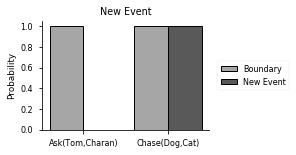

In [31]:
plot_results(sem_model.results, 'Ask(Tom,Charan) Chase(Dog,Cat)'.split(' '))
# plt.savefig('generalization_test_case_c.png', dpi=300, bbox_inches='tight')

In [32]:
sem_model.results.log_like

array([[ 0.        ,        -inf,        -inf],
       [-5.18627557,  2.        ,        -inf]])

In [33]:
print_evalute(test_c, sem_model.event_models[0])

t=0, f0=0.891568851495, origin=2.48438221807
t=1, f(x)=2.34961993628, f0=2.24690635498, origin=2.11574650794


In [34]:
print_models_likelihood(test_c, sem_model.event_models[0], sem_model.event_models[1])

t=0, p(f0_a)=9.25907017766, p(f0_a)=-97.2782028564
t=1, p(f(x)_a)=-6.98977621169, p(f0_a)=-5.36626534671, p(f0_b)=-86.5078794955


# Test Case D

In [35]:
# Ask(Tom, Charan) -> Ask(Tom, Charan)
sem_model = SEM(**sem_kwargs)
sem_model.pretrain(_x, event_types, event_boundaries)
sem_model._update_state(np.concatenate(test_d), 3)
sem_model.run(np.concatenate(test_d), compile_model=False)

results.append(
    {
        'Test Case': 'Ask(Tom,Charan)',
        'Boundary': np.exp(sem_model.results.log_boundary_probability)[1],
        'New Event': 1-sem_model.results.post[1, 0]
    }
)

print np.exp(sem_model.results.log_boundary_probability)
print sem_model.results.e_hat

Run SEM: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

[1.         0.99999995]
[0 0]


[0.         0.00017806]


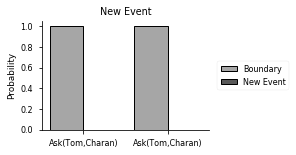

In [36]:
plot_results(sem_model.results, 'Ask(Tom,Charan) Ask(Tom,Charan)'.split(' '))
# plt.savefig('generalization_test_case_d.png', dpi=300, bbox_inches='tight')

## Test Case E

In [37]:
# Ask(Tom, Charan) -> Ask(Tom, Charan)
sem_model = SEM(**sem_kwargs)
sem_model.pretrain(_x, event_types, event_boundaries)
sem_model._update_state(np.concatenate(test_e), 3)
sem_model.run(np.concatenate(test_e), compile_model=False)

results.append(
    {
        'Test Case': 'Ask(Bruce, Dick)',
        'Boundary': np.exp(sem_model.results.log_boundary_probability)[1],
        'New Event': 1-sem_model.results.post[1, 0]
    }
)

print np.exp(sem_model.results.log_boundary_probability)
print sem_model.results.e_hat

Run SEM: 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

[1.         0.99888915]
[0 0]


[0.         0.08197996]


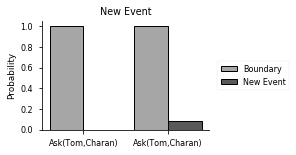

In [38]:
plot_results(sem_model.results, 'Ask(Tom,Charan) Ask(Tom,Charan)'.split(' '))
# plt.savefig('generalization_test_case_d.png', dpi=300, bbox_inches='tight')

# All test cases

In [39]:
results = pd.DataFrame(results)
results = results.loc[[0, 2, 1, 3, 4], ]
results.index = range(5)

In [40]:
results

,Boundary,New Event,Test Case
0,0.000012,0.000013,"Answer(Charan,Tom)"
1,0.999503,0.997170,"Chase(Dog,Cat)"
2,0.134102,0.113929,"Answer(Dick,Bruce)"
3,1.000000,0.000178,"Ask(Tom,Charan)"
4,0.998889,0.081980,"Ask(Bruce, Dick)"


In [41]:
x_labels = results['Test Case'].copy()


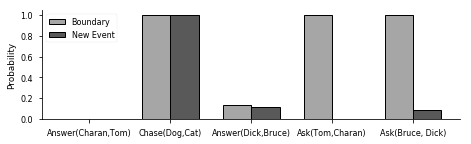

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 2.0), sharey=True)
w = 0.35

y = results.Boundary
x = [x0 - w/2. for x0 in results.index]
ax.bar(x, y, facecolor=[0.65, 0.65, 0.65], width=w, edgecolor='k', lw=1, label='Boundary')
ax.set_ylabel('Probability')

ax.set_xticks(results.index)
ax.set_xticklabels(x_labels, rotation=0)

y = results['New Event']
x = [x0 + w/2. for x0 in results.index]
ax.bar(x, y, facecolor=[0.35, 0.35, 0.35], width=w, edgecolor='k', lw=1, label='New Event')


plt.legend(loc='upper left')
sns.despine()
plt.savefig('generalization_demo_results.png', dpi=300)